##### 팬시 인덱싱
- 한 번에 여러 배열 요소에 접근하기 위해 인덱서의 배열을 전달하는 것

1. 팬시 인덱싱 알아보기

In [66]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [67]:
[x[3], x[7], x[2]]

[np.int32(71), np.int32(86), np.int32(14)]

In [68]:
ind = [3,7,4]
x[ind]

array([71, 86, 60], dtype=int32)

In [69]:
# 팬시 인덱싱을 사용하면 결과의 형상이 인덱싱 대상 배열의 형상이 아니라
# 인덱스 배열의 형상을 반영한다
ind = np.array ([[3,7],
                 [4,5]])
x[ind]

array([[71, 86],
       [60, 20]], dtype=int32)

In [70]:
# 팬시 인덱싱은 여러 차원에서도 동작한다
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [71]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [72]:
row.shape

(3,)

In [73]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [74]:
row[:, np.newaxis].shape

(3, 1)

In [75]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [76]:
# 각 행의 값은 산술 연산의 브로드캐스팅에서 본 것과 똑같이 각 열 벡터와 일치
# 팬시 인덱싱을 사용하면 반환값은 
# 인덱싱 대상 배열 형상이 아니라 브로드캐스팅된 인덱스의 형상 반영
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

2. 결합 인덱싱

In [77]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [78]:
# 팬시 인덱싱과 단순 인덱스의 결합
X[2,[2,0,1]]

array([10,  8,  9])

In [79]:
# 팬시 인덱싱과 슬라이싱의 결합
X[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [80]:
# 팬시 인덱싱과 마스킹의 결합
mask = np.array([1,0,1,0],dtype=bool)
X[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

3. 예제: 임의의 점 선택하기
- 팬시 인덱싱의 보편적 용도는 행렬에서 행의 부분집합을 선택하는 것

In [81]:
mean = [0,0] 
# center of the distribution # the mean vector
# each element in mean vector corresponds to the mean of one of the variables
# in the multivariate distribution
cov = [[1,2],
       [2,5]]
# the covariance matrix
# the covariance matrix specifies the spread and the relationship btw the variables
# the diagonal elements represent the variance of the individual variables
# variance of the first variable is 1 and the variance of the second variable is 5
# the off-diagonal elements represent the covariance btw the variables
# in this case the covariance btw the two variables is 2
X = rand.multivariate_normal(mean,cov,100)
# genereate 100 random samples from a multivariate normal distribution 
# with the specified mean vector(mean) and covariance matrix(cov)
X.shape
# (100,2) each row is a sample from the distribution (100 rows)

(100, 2)

> <공분산 개념 참고>  
> 1. variance(분산)  
> - `a measure of the variability or spread in a set of data`  
> 2. covariance(공분산)   
>   - `a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction. `
>   - `covariance is a measure of how much two random variables change together`  
> 3. covariance matrix = 정방행렬의 값을 분산과 공분산으로 채운 것    
> 4. ref:  
> https://adioshun.gitbooks.io/statics-with-r/content/variance-covariance-matrix.html

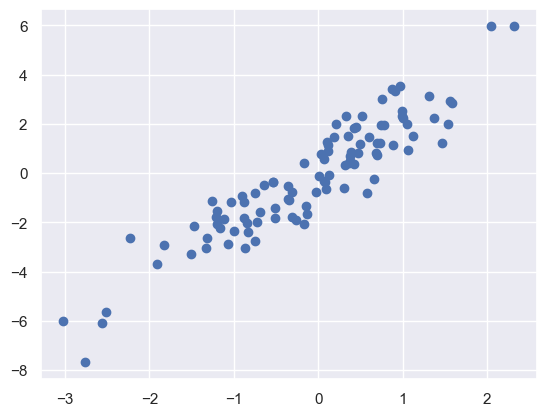

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_theme()

plt.scatter(X[:,0],X[:,1]);

In [83]:
plt.scatter?

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    Th

In [84]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([30, 56, 13, 41,  7, 20, 95,  3, 48, 14, 79, 12, 59, 26, 34, 89, 39,
       60, 84, 63], dtype=int32)

In [85]:
np.random.choice?

Signature: np.random.choice(a, size=None, replace=True, p=None)
Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the `~numpy.random.Generator.choice`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

.. warning::
    This function uses the C-long dtype, which is 32bit on windows
    and otherwise 64bit on 64bit platforms (and 32bit on 32bit ones).
    Since NumPy 2.0, NumPy's default integer is 32bit on 32bit platforms
    and 64bit on 64bit platforms.


Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a


In [86]:
selection = X[indices] # 여기에 펜시 인덱싱 사용
selection.shape

(20, 2)

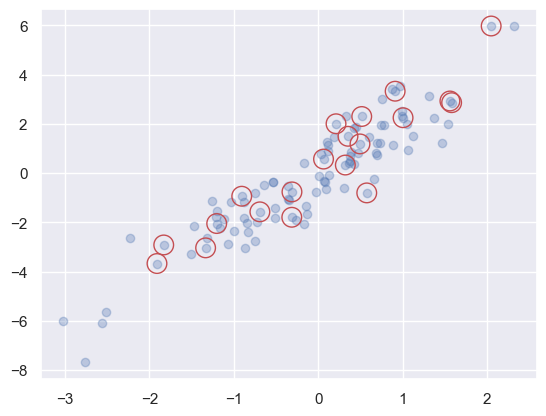

In [87]:
# 어느 점이 선택됐는지 보기 위해 선택된 점 위에 큰 동그라미 표시
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],
            facecolor='none',
            edgecolor='r', s=200);

4. 펜시 인덱싱으로 값 변경하기
- 팬시 인덱싱은 배열의 일부에 접근하는 데 사용되는 것과 마찬가지로, 배열의 일부를 수정하는 데도 사용될 수 있다.
- 예를 들어 인덱스 배열이 있고 배열에서 그 인덱스 배열에 해당하는 항목에 특정 값을 설정할 수 있다

In [88]:
import numpy as np

x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


할당 유형의 연산자는 모두 사용할 수 있다. 예를 들면

In [89]:
x[i]-=10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


> 할당 유형 연산자 (python in-place operator, compound assignment operator)  
> ex. -= operator substracts the right-hand operand from the left-hand operand and than assigns the result back to the left-hand operand.  
> a = a - b  
> a = 10  
> b = 3  
> a -= b # equivalent to a = a - b  
> print(a) #Output:7

> more compound assignment operators  
> 1. += additional assignment: adds the right-hand operand to the left-hand operand and assigns the result to the left-hand operand  
> 2. *= multiplication assignment: mutiplies the left-hand operand by the right-hand operand and assigns the result to the left-hand operand  
> 3. /= division assignment: devides the left-hand operand by the right-hand operand and assigns the result to the left-hand operand  
> 4. %= modulus assignment: takes the modulus of the left-hand by the right-hand operand and assigns the result to the left-hand opereand  
> 5. **= exponentiation assignment: raises the left-hand operand to the power of the right-hand operand and assigns the result to the left-hand operand  
> 6. //= floor division assignment: performs floor division on the left-hand operand by the right-hand operand and assigns the result to the left-hand operand.

반복되는 인덱스는 예상하지 못한 결과를 초래할 수도 있다.

In [90]:
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [91]:
x = np.zeros(10)
i = [2,3,3,4,4,4]
x[i] +=  1
x

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

- 작동 방식이 증가가 아니라 할당이므로 위와 같은 결과가 나온다
- 즉, x[i]+1을 평가 ('1') > 그 결과를 x의 인덱스에 할당하는 구조 (2 -> '1', 3 ->'1', 3->'1'...)로 작동하는 코드이기 때문에 값이 '1'로 나온다.

In [92]:
#반복식을 원한다면 이렇게 하면 된다
x = np.zeros(10)
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


5. 예제: 데이터 구간화

In [93]:
import numpy as np

np.random.seed(42)
x = np.random.randn(100)

# 직접 히스토그램 계산하기
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)
print(bins) # 데이터를 분류하는 통
print(counts) # 각 통에 데이터가 몇개 들어갔는지 세는 array

[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [94]:

# 각 x에 대한 적절한 구간 찾기
i = np.searchsorted(bins,x) 
# x의 데이터가 bins의 데이터 사이사이 몇번째 순서에 들어가야 순서가 맞는지 찾아주는 메서드
i

array([11, 10, 11, 13, 10, 10, 13, 11,  9, 11,  9,  9, 10,  6,  7,  9,  8,
       11,  8,  7, 13, 10, 10,  7,  9, 10,  8, 11,  9,  9,  9, 14, 10,  8,
       12,  8, 10,  6,  7, 10, 11, 10, 10,  9,  7,  9,  9, 12, 11,  7, 11,
        9,  9, 11, 12, 12,  8,  9, 11, 12,  9, 10,  8,  8, 12, 13, 10, 12,
       11,  9, 11, 13, 10, 13,  5, 12, 10,  9, 10,  6, 10, 11, 13,  9,  8,
        9, 12, 11,  9, 11, 10, 12,  9,  9,  9,  7, 11, 10, 10, 10])

> cf. searchsorted 메서드: 예를 들어 첫번째 데이터 0.4967141530112327은 11번째 데이터인 0.78947368과 10번째 데이터인 0.26315789 사이에 들어가므로 '11'이라는 값을 리턴한다.

In [95]:
x[0]

np.float64(0.4967141530112327)

In [96]:
# 각 구간에 1 더하기
np.add.at(counts,i,1)
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

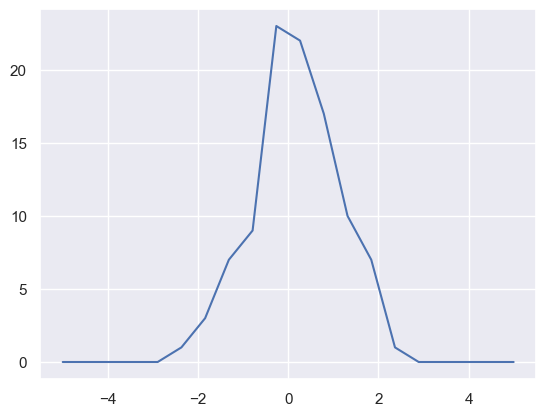

In [97]:
# 결과 플로팅하기
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn; seaborn.set_theme()
plt.plot(bins, counts); # linestyle = 'steps' 옵션이 없어졌다

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x25ee238c050>])

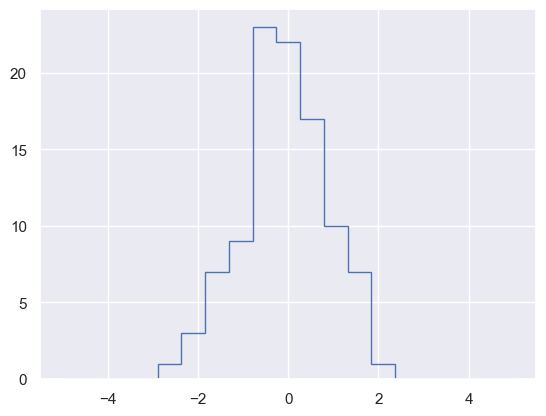

In [98]:
# 대신 히스토그램을 한 번에 그려주는 다음과 같은 메서드가 있음
plt.hist(x,bins, histtype='step')

In [99]:
np.random.randn?

Signature: np.random.randn(*args)
Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the
    `~numpy.random.Generator.standard_normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned 

In [100]:
np.random.randn(310,2,3)

array([[[-1.41537074, -0.42064532, -0.34271452],
        [-0.80227727, -0.16128571,  0.40405086]],

       [[ 1.8861859 ,  0.17457781,  0.25755039],
        [-0.07444592, -1.91877122, -0.02651388]],

       [[ 0.06023021,  2.46324211, -0.19236096],
        [ 0.30154734, -0.03471177, -1.16867804]],

       ...,

       [[ 0.26912694, -0.34319228,  0.62157189],
        [-0.36961034,  0.37710039, -0.02926281]],

       [[ 1.12605025, -0.05139372, -1.77303247],
        [ 1.2619215 , -0.9057323 , -0.65376634]],

       [[-0.59566129,  1.37443809, -2.13567421],
        [ 3.13774853,  1.05605681,  0.22323891]]])

In [101]:
np.zeros_like?

Signature:      
np.zeros_like(
    a,
    dtype=None,
    order='K',
    subok=True,
    shape=None,
    *,
    device=None,
)
Call signature:  np.zeros_like(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function zeros_like at 0x0000025ED98FF880>
File:            c:\users\chels\anaconda3\envs\emerald_city\lib\site-packages\numpy\_core\numeric.py
Docstring:      
Return an array of zeros with the same shape and type as a given array.

Parameters
----------
a : array_like
    The shape and data-type of `a` define these same attributes of
    the returned array.
dtype : data-type, optional
    Overrides the data type of the result.

    .. versionadded:: 1.6.0
order : {'C', 'F', 'A', or 'K'}, optional
    Overrides the memory layout of the result. 'C' means C-order,
    'F' means F-order, 'A' means 'F' if `a` is Fortran contiguous,
    'C' otherwise. 'K' means match the layout of `a` as closely
    as possible.

    .. versionadded:: 1.6.0
subok : bool, opt

In [102]:
np.zeros_like(bins)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [103]:
np.searchsorted?

Signature:       np.searchsorted(a, v, side='left', sorter=None)
Call signature:  np.searchsorted(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function searchsorted at 0x0000025ED98FC680>
File:            c:\users\chels\anaconda3\envs\emerald_city\lib\site-packages\numpy\_core\fromnumeric.py
Docstring:      
Find indices where elements should be inserted to maintain order.

Find the indices into a sorted array `a` such that, if the
corresponding elements in `v` were inserted before the indices, the
order of `a` would be preserved.

Assuming that `a` is sorted:

======  ============================
`side`  returned index `i` satisfies
======  ============================
left    ``a[i-1] < v <= a[i]``
right   ``a[i-1] <= v < a[i]``
======  ============================

Parameters
----------
a : 1-D array_like
    Input array. If `sorter` is None, then it must be sorted in
    ascending order, otherwise `sorter` must be an array of indices
    that sort it

In [104]:
# 구간화 연산에 필요한 시간 비교
print("NumPy routine:")
%timeit counts, edges = np.histogram(x,bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

NumPy routine:
39.9 μs ± 5.79 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Custom routine:
18.4 μs ± 827 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [105]:
np.histogram??

Signature:       np.histogram(a, bins=10, range=None, density=None, weights=None)
Call signature:  np.histogram(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function histogram at 0x0000025ED9A1AFC0>
File:            c:\users\chels\anaconda3\envs\emerald_city\lib\site-packages\numpy\lib\_histograms_impl.py
Source:         
@array_function_dispatch(_histogram_dispatcher)
def histogram(a, bins=10, range=None, density=None, weights=None):
    r"""
    Compute the histogram of a dataset.

    Parameters
    ----------
    a : array_like
        Input data. The histogram is computed over the flattened array.
    bins : int or sequence of scalars or str, optional
        If `bins` is an int, it defines the number of equal-width
        bins in the given range (10, by default). If `bins` is a
        sequence, it defines a monotonically increasing array of bin edges,
        including the rightmost edge, allowing for non-uniform bin widths.

        .. versionad

In [107]:
# 데이터 포인트 개수가 많아질 때에는 오히려 루틴화된 메서드가 성능이 더 좋다
# 루틴 알고리즘이 더 유연함 >> 알고리즘 효율성은 간단한 문제가 아님
x = np.random.randn(1000000)
print("NumPy routine")
%timeit counts, edges = np.histogram(x,bins)

print("Custom routine")
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

NumPy routine
18.9 ms ± 5.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine
128 ms ± 8.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
